In [91]:
import pandas as pd
import numpy as np              # IMPORTING BASIC LIBRARIES
import matplotlib.pyplot as plt

In [93]:
df=pd.read_csv(r"C:\Users\This PC\OneDrive\OneDrive - Islamabad Model Postgraduate College of Commerce H-8 4 Islamabad\SZABIST WORKING ZONE\SZABIST WORKING S 4\DATASETS\CustomerChurnPrediction\Churn_Modelling.csv")


In [95]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [97]:
df.isnull().sum()           # CHECKING NULL DATA

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
df=df.dropna()             # REMOVING NULL DATA

In [101]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [103]:
df.duplicated().sum()        # CHECKING DUPLICATES AND REMOVING THEM

2

In [104]:
df=df.drop_duplicates()

In [107]:
df.duplicated().sum()

0

In [109]:
df.shape

(9996, 14)

In [111]:
df.info()        # Getting Basic Imformation about dataset

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9996 non-null   int64  
 1   CustomerId       9996 non-null   int64  
 2   Surname          9996 non-null   object 
 3   CreditScore      9996 non-null   int64  
 4   Geography        9996 non-null   object 
 5   Gender           9996 non-null   object 
 6   Age              9996 non-null   float64
 7   Tenure           9996 non-null   int64  
 8   Balance          9996 non-null   float64
 9   NumOfProducts    9996 non-null   int64  
 10  HasCrCard        9996 non-null   float64
 11  IsActiveMember   9996 non-null   float64
 12  EstimatedSalary  9996 non-null   float64
 13  Exited           9996 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [113]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5002.497899,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,2885.744618,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2503.750000,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5002.500000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,7501.250000,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [115]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')

BASIC VISUALIZATION'S

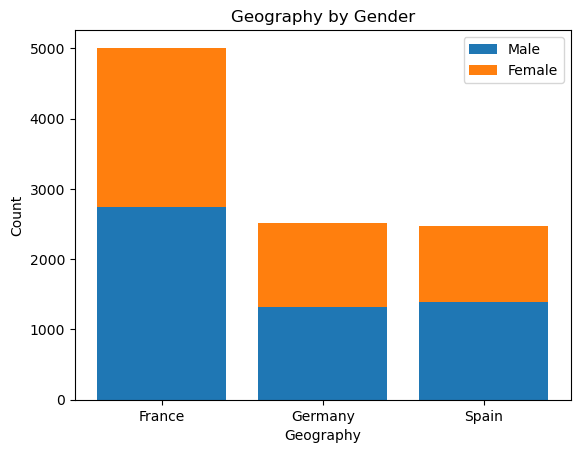

Total
Geography
France     5011
Germany    2509
Spain      2476
Name: count, dtype: int64


In [118]:
import matplotlib.pyplot as plt

# Count values
geo_gender = df.groupby(['Geography', 'Gender']).size().unstack()

# Plot
plt.bar(geo_gender.index, geo_gender['Male'], label='Male')
plt.bar(geo_gender.index, geo_gender['Female'], bottom=geo_gender['Male'], label='Female')

plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography by Gender')
plt.legend()
plt.show()

# Total count
print("Total")
print(df["Geography"].value_counts())


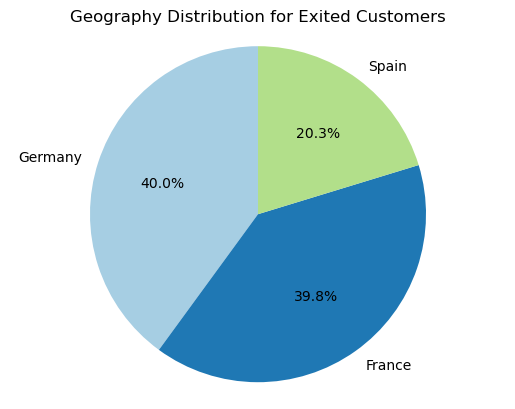

In [121]:
# Filter Exited=1
exited_geo = df[df['Exited'] == 1]['Geography'].value_counts()

# Plot
plt.pie(exited_geo, labels=exited_geo.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Geography Distribution for Exited Customers')
plt.axis('equal')
plt.show()


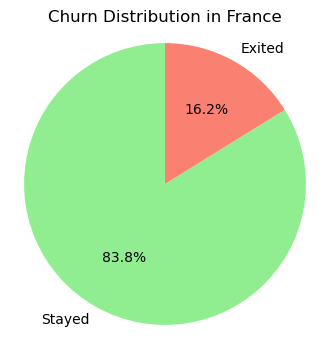

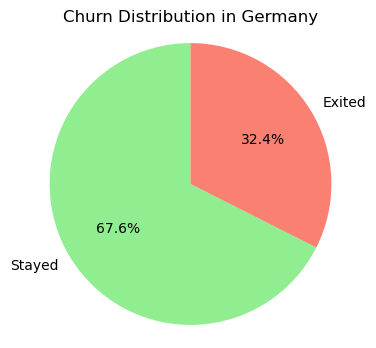

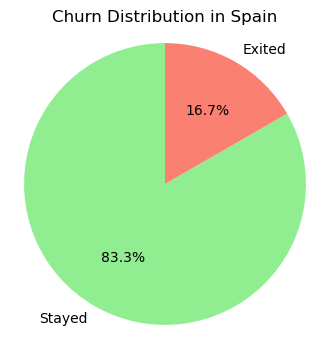

In [123]:
import matplotlib.pyplot as plt

# Group and count
geo_exit = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Plot pie chart for each Geography
for geo in geo_exit.index:
    values = geo_exit.loc[geo]
    labels = ['Stayed', 'Exited']
    colors = ['lightgreen', 'salmon']
    
    plt.figure(figsize=(4, 4))
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Churn Distribution in {geo}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
    plt.show()


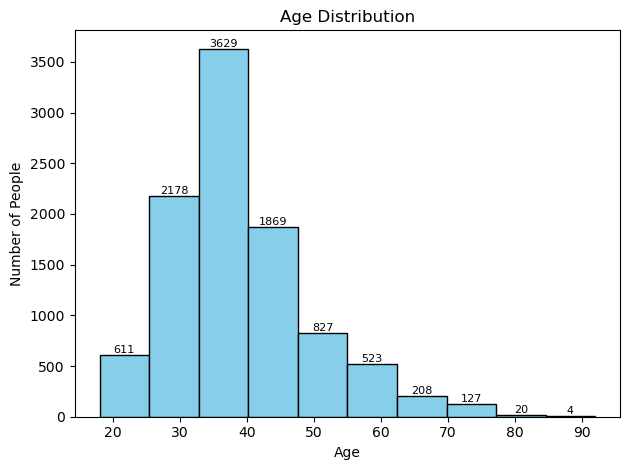

In [125]:

# Plot histogram
counts, bins, patches = plt.hist(df["Age"], bins=10, edgecolor='black', color='skyblue')

# Add bar labels
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width()/2, count, int(count),
             ha='center', va='bottom', fontsize=8)

# Labels
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Age Distribution")
plt.tight_layout()
plt.show()


In [127]:
# Ecoded the categorical column
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [129]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [133]:
# X and Y  
X =df.drop("Exited",axis=1)
Y = df[["Exited"]]

In [135]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


In [137]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [145]:

# Model training
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train.values.ravel())




C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [147]:
# Make predictions
y_pred = model.predict(X_test)

# Show first 10 predictions vs actual values
print("Predicted values:", y_pred[:10])
print("Actual values:   ", y_test[:10].values)


Predicted values: [0 0 0 0 0 0 0 0 0 0]
Actual values:    [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


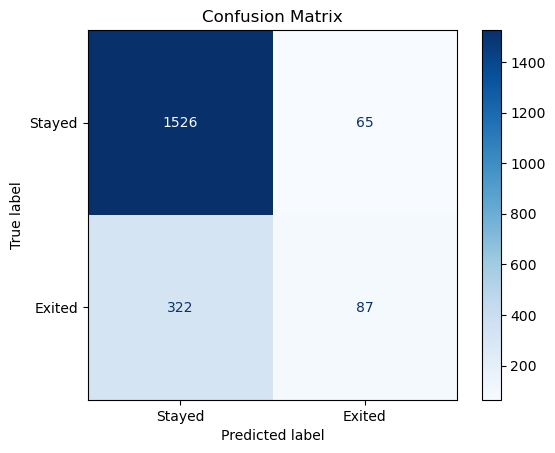

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.83      0.96      0.89      1591
      Exited       0.57      0.21      0.31       409

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.77      0.81      0.77      2000



In [149]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Exited"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Stayed", "Exited"]))


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Predict on test set
rf_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8585


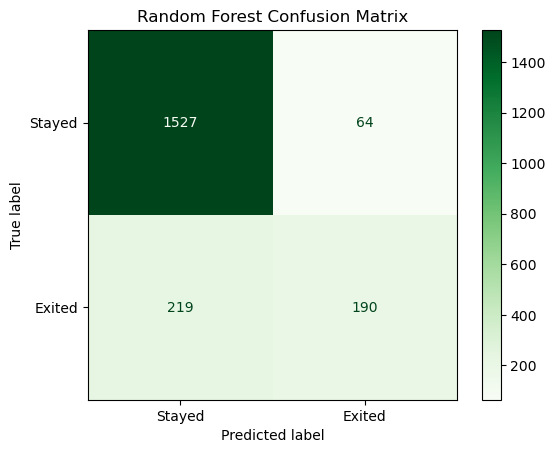

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.92      1591
      Exited       0.75      0.46      0.57       409

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [156]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, rf_pred, target_names=["Stayed", "Exited"]))
